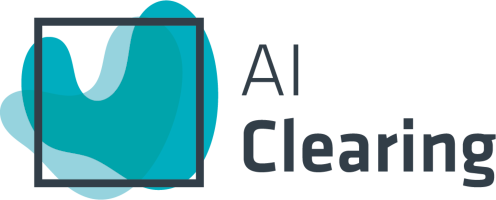

---
# Introduction
At AI Clearing we use image classification and segmentation models based on deep convolutional neural networks for construction site progress reporting. We have prepared two tasks for you which are closely related to what you would deal with on a daily basis if you were in the AI team.



# Task 1

Download the Fashion-MNIST dataset (https://github.com/zalandoresearch/fashion-mnist). It contains 28x28 single-channel images of clothes grouped into ten classes. There are 60000 examples in the training dataset and 10000 examples in the test dataset. Each training and test example has one of the following labels assigned:

| Label | Description |
| ----- | ----------- |
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

We will focus on detecting shoes. Labels 5, 7 and 9 (Sandal, Sneaker and Ankle boot) should be treated as positive and all others (such as Trouser, Dress and so on) should be negative.

Please prepare a CNN model for binary classification in PyTorch. You should propose a custom architecture instead of using pretrained models. Train it on samples from Fashion-MNIST’s train dataset and evaluate the quality of the proposed model on samples from Fashion-MNIST’s test dataset.


In [28]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torch.utils.data import random_split, DataLoader
import torch.nn as nn

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

#HYPER
BATCH_SIZE = 128
LEARNNING_RATE = 0.001
EPOCHS = 100

#Dataset & Dataloader
train_dataset = FashionMNIST(root='./', train=True, download=True, transform=ToTensor())
test_dataset =  FashionMNIST(root='./', train=False, download=True, transform=ToTensor())

train_size = int(len(train_dataset)*0.8)
val_size = int(len(train_dataset) - train_size)


train, validation = random_split(dataset = train_dataset, 
                          lengths = [train_size, val_size], 
                          generator = torch.Generator().manual_seed(77))


train_dataloader = DataLoader(dataset=train, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_dataloader = DataLoader(dataset = validation, batch_size=BATCH_SIZE, shuffle = False, num_workers=2)
test_dataloader = DataLoader(dataset = test_dataset, batch_size=BATCH_SIZE, shuffle = True, num_workers=2)

#Prepare binary classes
targets_dict = train_dataset.class_to_idx
shoe_category = []
for key, val in targets_dict.items():
    if key == 'Sandal' or key == 'Sneaker' or key == 'Ankle boot':
        shoe_category.append(val)

#MODEL
class BinaryFMnist(nn.Module):
    def __init__(self):
        super(BinaryFMnist, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32 * 7 * 7, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

#MCO
model = BinaryFMnist()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNNING_RATE)

#
def relabel_target(label):
    """
    Returns torch.tensor with a binary category way. 
    If an image depicts foot wearables, function returns torch.tensor([1.0]),
    for any other wearable, returns torch.tensor([0.0])
    """
    target = []
    for idx, value in enumerate(label):
            if value.item() in shoe_category:
                target.append([1.0])
            else:
                target.append([0.0])
    label = torch.tensor(target)
    return label

running_loss = []
iterations = len(train_dataloader)/BATCH_SIZE
for epoch in tqdm(range(EPOCHS)):
    for i, (img, label) in enumerate(train_dataloader):
        
        label = relabel_target(label)
        output = model(img)
        loss = criterion(output, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    running_loss.append(loss.item())
    print('Epoch: ', epoch, f'{sum(running_loss)/len(running_loss):.6f}')

plt.plot(running_loss)


  1%|          | 1/100 [00:05<08:23,  5.09s/it]

Epoch:  0 0.000747


  2%|▏         | 2/100 [00:10<08:22,  5.12s/it]

Epoch:  1 0.000696


  3%|▎         | 3/100 [00:14<07:30,  4.64s/it]

Epoch:  2 0.011847


  4%|▍         | 4/100 [00:20<08:12,  5.13s/it]

Epoch:  3 0.009126


  5%|▌         | 5/100 [00:24<07:28,  4.72s/it]

Epoch:  4 0.011139


  6%|▌         | 6/100 [00:28<07:05,  4.52s/it]

Epoch:  5 0.011761


  7%|▋         | 7/100 [00:32<06:51,  4.43s/it]

Epoch:  6 0.010111


  8%|▊         | 8/100 [00:36<06:29,  4.23s/it]

Epoch:  7 0.008858


  9%|▉         | 9/100 [00:40<06:28,  4.27s/it]

Epoch:  8 0.008955


 10%|█         | 10/100 [00:44<06:22,  4.25s/it]

Epoch:  9 0.008329


 11%|█         | 11/100 [00:49<06:13,  4.20s/it]

Epoch:  10 0.007636


 12%|█▏        | 12/100 [00:52<05:52,  4.01s/it]

Epoch:  11 0.007063


 13%|█▎        | 13/100 [00:56<05:49,  4.02s/it]

Epoch:  12 0.006559


 14%|█▍        | 14/100 [01:00<05:46,  4.03s/it]

Epoch:  13 0.006104


 15%|█▌        | 15/100 [01:04<05:47,  4.09s/it]

Epoch:  14 0.005713


 16%|█▌        | 16/100 [01:09<05:46,  4.13s/it]

Epoch:  15 0.005377


 17%|█▋        | 17/100 [01:14<06:05,  4.40s/it]

Epoch:  16 0.005063


 18%|█▊        | 18/100 [01:18<06:10,  4.52s/it]

Epoch:  17 0.004785


 19%|█▉        | 19/100 [01:23<05:55,  4.39s/it]

Epoch:  18 0.004534


 20%|██        | 20/100 [01:26<05:39,  4.24s/it]

Epoch:  19 0.004309


 21%|██        | 21/100 [01:31<05:36,  4.26s/it]

Epoch:  20 0.004105


 22%|██▏       | 22/100 [01:35<05:24,  4.16s/it]

Epoch:  21 0.003919


 23%|██▎       | 23/100 [01:38<05:12,  4.05s/it]

Epoch:  22 0.003749


 24%|██▍       | 24/100 [01:42<05:02,  3.97s/it]

Epoch:  23 0.003604


 25%|██▌       | 25/100 [01:46<04:58,  3.98s/it]

Epoch:  24 0.003463


 26%|██▌       | 26/100 [01:50<04:53,  3.96s/it]

Epoch:  25 0.003331


 27%|██▋       | 27/100 [01:54<04:48,  3.96s/it]

Epoch:  26 0.003208


 28%|██▊       | 28/100 [01:58<04:43,  3.94s/it]

Epoch:  27 0.003094


 29%|██▉       | 29/100 [02:02<04:38,  3.92s/it]

Epoch:  28 0.002988


 30%|███       | 30/100 [02:06<04:37,  3.97s/it]

Epoch:  29 0.002888


 31%|███       | 31/100 [02:10<04:37,  4.02s/it]

Epoch:  30 0.002795


 32%|███▏      | 32/100 [02:15<04:42,  4.15s/it]

Epoch:  31 0.002708


 33%|███▎      | 33/100 [02:20<04:55,  4.41s/it]

Epoch:  32 0.002626


 34%|███▍      | 34/100 [02:26<05:33,  5.06s/it]

Epoch:  33 0.002549


 35%|███▌      | 35/100 [02:34<06:28,  5.98s/it]

Epoch:  34 0.002476


 36%|███▌      | 36/100 [02:39<05:50,  5.47s/it]

Epoch:  35 0.002407


 37%|███▋      | 37/100 [02:43<05:25,  5.17s/it]

Epoch:  36 0.002342


 38%|███▊      | 38/100 [02:48<05:11,  5.02s/it]

Epoch:  37 0.002282


 39%|███▉      | 39/100 [02:53<05:19,  5.24s/it]

Epoch:  38 0.002223


 40%|████      | 40/100 [02:59<05:13,  5.22s/it]

Epoch:  39 0.002168


 41%|████      | 41/100 [03:05<05:24,  5.50s/it]

Epoch:  40 0.002115


 42%|████▏     | 42/100 [03:12<05:42,  5.90s/it]

Epoch:  41 0.002065


 43%|████▎     | 43/100 [03:18<05:52,  6.19s/it]

Epoch:  42 0.002017


 44%|████▍     | 44/100 [03:27<06:25,  6.88s/it]

Epoch:  43 0.001971


 45%|████▌     | 45/100 [03:36<06:52,  7.49s/it]

Epoch:  44 0.001928


 46%|████▌     | 46/100 [03:46<07:29,  8.33s/it]

Epoch:  45 0.001887


 47%|████▋     | 47/100 [03:57<08:06,  9.18s/it]

Epoch:  46 0.001846


 48%|████▊     | 48/100 [04:10<08:59, 10.37s/it]

Epoch:  47 0.001808


 49%|████▉     | 49/100 [04:24<09:44, 11.46s/it]

Epoch:  48 0.001771


 50%|█████     | 50/100 [04:39<10:20, 12.41s/it]

Epoch:  49 0.001736


 51%|█████     | 51/100 [04:54<10:51, 13.30s/it]

Epoch:  50 0.001702


 52%|█████▏    | 52/100 [05:12<11:37, 14.53s/it]

Epoch:  51 0.001669


 53%|█████▎    | 53/100 [05:30<12:17, 15.69s/it]

Epoch:  52 0.001638


 54%|█████▍    | 54/100 [05:50<12:55, 16.86s/it]

Epoch:  53 0.001607


 55%|█████▌    | 55/100 [06:10<13:21, 17.81s/it]

Epoch:  54 0.001578


 56%|█████▌    | 56/100 [06:32<14:01, 19.13s/it]

Epoch:  55 0.001550


 57%|█████▋    | 57/100 [06:57<14:53, 20.77s/it]

Epoch:  56 0.001523


 58%|█████▊    | 58/100 [07:23<15:46, 22.53s/it]

Epoch:  57 0.001497


 59%|█████▉    | 59/100 [07:51<16:27, 24.08s/it]

Epoch:  58 0.001471


 60%|██████    | 60/100 [08:17<16:25, 24.64s/it]

Epoch:  59 0.001448


 61%|██████    | 61/100 [08:26<12:59, 19.98s/it]

Epoch:  60 0.001424


 62%|██████▏   | 62/100 [08:36<10:42, 16.90s/it]

Epoch:  61 0.001402


 63%|██████▎   | 63/100 [08:47<09:18, 15.10s/it]

Epoch:  62 0.001380


 64%|██████▍   | 64/100 [08:58<08:19, 13.88s/it]

Epoch:  63 0.001358


 65%|██████▌   | 65/100 [09:10<07:44, 13.26s/it]

Epoch:  64 0.001337


 66%|██████▌   | 66/100 [09:22<07:27, 13.16s/it]

Epoch:  65 0.001317


 67%|██████▋   | 67/100 [09:36<07:21, 13.38s/it]

Epoch:  66 0.001297


 68%|██████▊   | 68/100 [09:53<07:35, 14.23s/it]

Epoch:  67 0.001278


 69%|██████▉   | 69/100 [10:09<07:41, 14.90s/it]

Epoch:  68 0.001260


 70%|███████   | 70/100 [10:26<07:48, 15.61s/it]

Epoch:  69 0.001242


 71%|███████   | 71/100 [10:44<07:52, 16.28s/it]

Epoch:  70 0.001224


 72%|███████▏  | 72/100 [11:04<08:03, 17.26s/it]

Epoch:  71 0.001207


 73%|███████▎  | 73/100 [11:24<08:13, 18.27s/it]

Epoch:  72 0.001191


 74%|███████▍  | 74/100 [11:46<08:21, 19.27s/it]

Epoch:  73 0.001175


 75%|███████▌  | 75/100 [12:08<08:25, 20.23s/it]

Epoch:  74 0.001159


 76%|███████▌  | 76/100 [12:32<08:30, 21.26s/it]

Epoch:  75 0.001144


 77%|███████▋  | 77/100 [12:57<08:31, 22.26s/it]

Epoch:  76 0.001129


 78%|███████▊  | 78/100 [13:23<08:36, 23.49s/it]

Epoch:  77 0.001115


 79%|███████▉  | 79/100 [13:50<08:35, 24.53s/it]

Epoch:  78 0.001100


 80%|████████  | 80/100 [14:19<08:35, 25.78s/it]

Epoch:  79 0.001087


 81%|████████  | 81/100 [14:48<08:30, 26.85s/it]

Epoch:  80 0.001073


 82%|████████▏ | 82/100 [15:18<08:22, 27.89s/it]

Epoch:  81 0.001060


 83%|████████▎ | 83/100 [15:50<08:14, 29.06s/it]

Epoch:  82 0.001047


 84%|████████▍ | 84/100 [16:22<07:59, 29.99s/it]

Epoch:  83 0.001035


 85%|████████▌ | 85/100 [16:56<07:45, 31.01s/it]

Epoch:  84 0.001023


 86%|████████▌ | 86/100 [17:31<07:32, 32.34s/it]

Epoch:  85 0.001011


 87%|████████▋ | 87/100 [18:08<07:17, 33.65s/it]

Epoch:  86 0.000999


 88%|████████▊ | 88/100 [18:45<06:57, 34.76s/it]

Epoch:  87 0.000988


 89%|████████▉ | 89/100 [19:26<06:41, 36.48s/it]

Epoch:  88 0.000977


 90%|█████████ | 90/100 [20:06<06:16, 37.66s/it]

Epoch:  89 0.000966


 91%|█████████ | 91/100 [20:47<05:48, 38.72s/it]

Epoch:  90 0.000955


 92%|█████████▏| 92/100 [21:31<05:20, 40.10s/it]

Epoch:  91 0.000945


 93%|█████████▎| 93/100 [22:14<04:48, 41.21s/it]

Epoch:  92 0.000935


 94%|█████████▍| 94/100 [23:00<04:15, 42.62s/it]

Epoch:  93 0.000925


 95%|█████████▌| 95/100 [23:46<03:37, 43.50s/it]

Epoch:  94 0.000915


 96%|█████████▌| 96/100 [24:32<02:57, 44.29s/it]

Epoch:  95 0.000906


 97%|█████████▋| 97/100 [25:19<02:15, 45.15s/it]

Epoch:  96 0.000896


In [27]:
correct = 0
total = 0

test_iter = iter(test_dataloader)
with torch.no_grad():
    for _, (img, label) in enumerate(test_dataloader):
        label = relabel_target(label)
        output = model(img)

        if output.argmax().item() == label.argmax().item():
            correct += 1

print("Model accuracy: ", 100 * correct/len(test_dataloader), "%")
    

Model accuracy:  34.177215189873415 %


# Task 2
After finishing the first task you should have a pre-trained CNN model. Your second task will be to classify shoes into two groups - Heels and Flats. Download the Shoes dataset (https://drive.google.com/file/d/18vadC13cpUlfXaSoYb7tk0nVZ9jw4VhX). There are two samples in the training split: one sample of Heels and one sample of Flats. Your solution can only use these examples and the model from the previous task. Evaluate the quality of your model on a provided test dataset.


In [ ]:
# Solution for Task 2
